In [1]:
import pandas as pd

In [2]:
df = pd.read_json("./Musical_instruments_meta_2.json")

In [3]:
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[[Musical Instruments]],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,Vivaldi's famous set of four violin concertos ...
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[[Musical Instruments]],NaN,NaN,444 pages. \nReprint of corrected and revised ...
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN


En primer lloc miro:

    a. Quants productes tenen descripció
    b. D'aquests, quants tenen més de 3 frases.
    c. Quina és la longitud mitja d'aquestes frases
    
Pensant en [aquest paper](https://arxiv.org/abs/2003.13138)

In [4]:
non_nan_count = df['description'].count()
print("Hi ha", non_nan_count, "files amb descripció, que es un", non_nan_count/df.shape[0]*100, "%")

Hi ha 78629 files amb descripció, que es un 92.61257229007903 %


In [5]:
df['num_sentences_descr'] = df['description'].str.count('\.') + 1
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN,NaN
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[[Musical Instruments]],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[[Musical Instruments]],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[[Musical Instruments, Instrument Accessories,...",NaN,NaN,NaN,NaN


In [6]:
three_or_more = (df['num_sentences_descr'] >= 3).sum()
print("Hi ha", three_or_more, "files amb descripcions de 3 o més frases, que es un", three_or_more/df.shape[0]*100, "%")

Hi ha 51295 files amb descripcions de 3 o més frases, que es un 60.41742735656824 %


In [7]:
avg_length = df["num_sentences_descr"].mean()
print("Les descripcions, quan existeixen, tenen de mitja una longitud de", avg_length, "frases (separades per .).")

Les descripcions, quan existeixen, tenen de mitja una longitud de 5.232865736560302 frases (separades per .).


Concateno, quan existeix, títol, marca i categoríes.

In [8]:
df['categories'] = df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['categories_str'] = df['categories'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else '')
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr,categories_str
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G..."
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[Musical Instruments],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0,Musical Instruments
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0,"Musical Instruments, Instrument Accessories, G..."
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[Musical Instruments],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0,Musical Instruments
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G..."


In [9]:
df['combined_text'] = df.apply(
    lambda row: (
       ( str(row['brand']) + '. ' if not pd.isna(row['brand']) else '') +
        ( str(row['title']) +'. ' if not pd.isna(row['title']) else '') +
    ( str(row['categories_str']) + '. ' if not pd.isna(row['categories_str']) else '') +
    str(row['description'])),
    axis=1
)
df.head()

,asin,title,price,imUrl,salesRank,categories,related,brand,description,num_sentences_descr,categories_str,combined_text
0,0006428320,"Six Sonatas For Two Flutes Or Violins, Volume ...",17.95,http://ecx.images-amazon.com/images/I/41EpRmh8...,{'Musical Instruments': 207315},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G...","Six Sonatas For Two Flutes Or Violins, Volume ..."
1,0014072149,Double Concerto in D Minor By Johann Sebastian...,18.77,http://ecx.images-amazon.com/images/I/41m6ygCq...,{'Musical Instruments': 94593},[Musical Instruments],"{'also_viewed': ['B0058DK7RA'], 'buy_after_vie...",,Composer: J.S. Bach.Peters Edition.For two vio...,6.0,Musical Instruments,. Double Concerto in D Minor By Johann Sebasti...
2,0041291905,Hal Leonard Vivaldi Four Seasons for Piano (Or...,NaN,http://ecx.images-amazon.com/images/I/41maAqSO...,{'Musical Instruments': 222972},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,Vivaldi's famous set of four violin concertos ...,4.0,"Musical Instruments, Instrument Accessories, G...",Hal Leonard Vivaldi Four Seasons for Piano (Or...
3,0041913574,"Aida: Opera in Quattro Atti, Partitura -- Aida...",49.99,http://ecx.images-amazon.com/images/I/513kRMv%...,NaN,[Musical Instruments],NaN,NaN,444 pages. \nReprint of corrected and revised ...,3.0,Musical Instruments,"Aida: Opera in Quattro Atti, Partitura -- Aida..."
4,0201891859,Nocturnes,NaN,http://ecx.images-amazon.com/images/I/41SXCAzs...,{'Musical Instruments': 171871},"[Musical Instruments, Instrument Accessories, ...",NaN,NaN,NaN,NaN,"Musical Instruments, Instrument Accessories, G...","Nocturnes. Musical Instruments, Instrument Acc..."


Igual que abans

In [10]:
non_nan_count = df['combined_text'].count()
print("Hi ha", non_nan_count, "files amb combined_text, que es un", non_nan_count/df.shape[0]*100, "%")
df['num_sentences_descr'] = df['combined_text'].str.count('\.') + 1
df.head()
three_or_more = (df['num_sentences_descr'] >= 3).sum()
print("Hi ha", three_or_more, "files amb combined_text de 3 o més frases, que es un", three_or_more/df.shape[0]*100, "%")
avg_length = df["num_sentences_descr"].mean()
print("Les combined_text, quan existeixen, tenen de mitja una longitud de", avg_length, "frases (separades per .).")

Hi ha 84901 files amb combined_text, que es un 100.0 %
Hi ha 80753 files amb combined_text de 3 o més frases, que es un 95.11430960766069 %
Les combined_text, quan existeixen, tenen de mitja una longitud de 7.29825325967892 frases (separades per .).


Aquí comenca el TDA; seguint els PAPERS

a. [TOPOLOGICAL DATA ANALYSIS IN TEXT CLASSIFICATION:
EXTRACTING FEATURES WITH ADDITIVE INFORMATION](https://arxiv.org/pdf/2003.13138.pdf)
* APPROACH 1: Topological features from word embeddings

Our method of extracting topological features from embeddings is described in Algorithm 1. Assume that a document
with T tokens is represented in D-dimensional word embedding by ΨT ×D

Per tant entenc que això seria després de fer algo tipo BERT a cada una de les T paraules per transformar-les en un vector de D dimensions, no thank you això va després

* APPROACH 2: Topological features de TF-IDF space

We divide each document into 10 consecutive blocks of equal size, we calculate TF-IDF vector for each block. We
chose 10, but one may try different number of blocks for each document. However, we note that using a large number
of blocks could make the TF-IDF vectors too sparse, so that comparing them would not be useful. For instance, if an
average number of tokens in a document is only 200 tokens and we divide each of the documents into 100 blocks, there
would be two tokens in each block, and most of the blocks would have zero similarity

In our experiments, we work on graphs of 10 vertices, where each vertex is represented by its TF-IDF vector

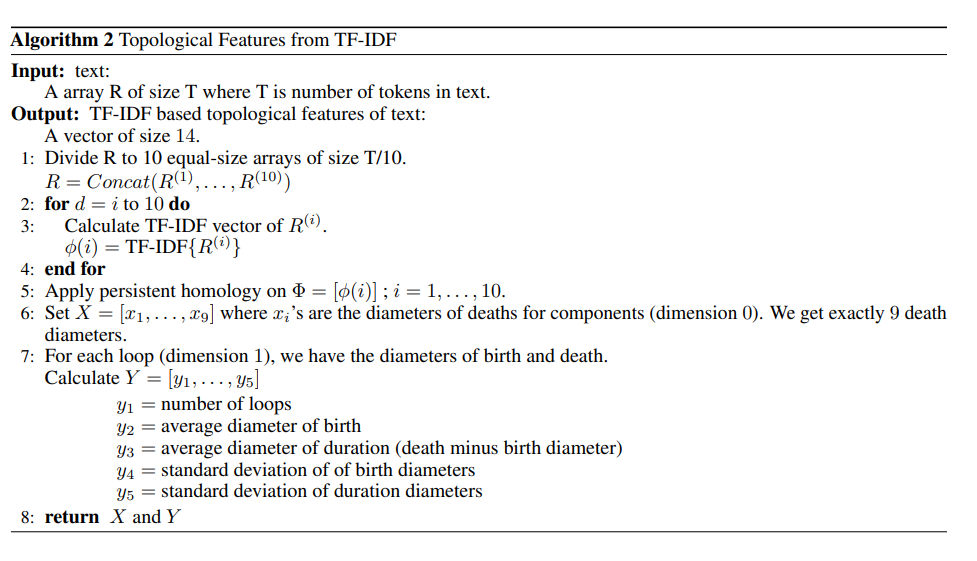

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

def calculate_tfidf(text):
    # Convert to lowercase
    text_lower = text.lower()

    # Remove non-word characters (keep only letters and numbers)
    text_cleaned = re.sub(r'\W', ' ', text_lower)
    
    # Step 1: Divide text into 10 equal-size arrays
    paraules = text_lower.split()
    T = len(paraules)
    
    n_blocks = 5
    
    chunks = []
    res = T%n_blocks
    chunk_size_a = T // n_blocks + 1 #arbitrariament trio que els primers siguin llargs
    a = []
    for i in range(0, res * chunk_size_a, chunk_size_a):
        a.append(" ".join(paraules[i:i + chunk_size_a]))
    chunk_size_b = T // n_blocks
    b = [" ".join(paraules[i:i + chunk_size_b]) for i in range(res * chunk_size_a, T, chunk_size_b)]
    chunks = a+b
    
    print(chunks)
    
    # Step 2-4: Calculate TF-IDF vectors for each chunk
    tfidf_vectorizer = TfidfVectorizer()
    aux = tfidf_vectorizer.fit_transform(chunks).toarray()
    
    return(np.asarray(aux))
    

# Example usage:
text = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Replace this with your actual array R

calculate_tfidf("a ba bb a b a")


['a ba', 'bb', 'a', 'b', 'a']


array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [12]:
print(df.loc[0,"combined_text"])
print(calculate_tfidf(df.loc[0,"combined_text"]))

Six Sonatas For Two Flutes Or Violins, Volume 2 (#4-6). Musical Instruments, Instrument Accessories, General Accessories, Sheet Music Folders. nan
['six sonatas for two', 'flutes or violins, volume', '2 (#4-6). musical instruments,', 'instrument accessories, general accessories,', 'sheet music folders. nan']
[[0.         0.         0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.
  0.5        0.5        0.5        0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.5        0.
  0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.70710678 0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.81649658 0.         0.         0.         0.40824829 0.40824829
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  

In [13]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(42)  # Create a random number generator

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import coo_matrix

from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence

from igraph import Graph

from IPython.display import SVG, display

import torch


import gudhi as gd

import gudhi.representations
import matplotlib.pyplot as plt

b. [USING TOPOLOGICAL DATA ANALYSIS FOR TEXT CLASSIFICATION](https://www.proquest.com/openview/6b7a6c694a0ded3edf2f6577b9ff4794/1?pq-origsite=gscholar&cbl=18750)

# Word2Vec

In [14]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

# Reads ‘alice.txt’ file
sample = open("alice.txt","r",encoding='utf-8')
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
	temp = []
	
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())

	data.append(temp)

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							vector_size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ",
	model1.wv.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ",
	model1.wv.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
											window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ",
	model2.wv.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ",
	model2.wv.similarity('alice', 'machines'))


Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9806748
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9754948
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.6124693
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.7649323


In [15]:
model2.wv.vectors

array([[-0.00407891,  0.14650804,  0.15383956, ...,  0.04121608,
        -0.00982653, -0.00385221],
       [-0.12298068,  0.23801416,  0.21683668, ..., -0.01907082,
         0.02447973,  0.05239458],
       [ 0.01976829,  0.17875694,  0.15444754, ...,  0.1170219 ,
         0.05009957,  0.03804929],
       ...,
       [-0.01735833,  0.04677835,  0.03901229, ..., -0.00152084,
         0.02101321,  0.00300883],
       [-0.01070298,  0.03543435,  0.0266729 , ...,  0.01423293,
         0.02171016,  0.0040449 ],
       [-0.03501032,  0.05511262,  0.04954239, ...,  0.01684494,
         0.03112293, -0.00125174]], dtype=float32)

In [16]:
model2.wv.key_to_index
model2.wv.vectors[model2.wv.key_to_index['alice']]

array([ 0.11979388,  0.12970953,  0.15553807,  0.16342047,  0.20420401,
       -0.41597348,  0.12794875,  0.5490237 , -0.275206  , -0.24755163,
       -0.05163648, -0.31411013, -0.0205276 ,  0.23280136,  0.02063558,
       -0.28669932,  0.02593004, -0.18108298, -0.12846027, -0.78310454,
        0.2397644 ,  0.06203348,  0.47130194, -0.23886739, -0.11133532,
       -0.04961525, -0.2236604 ,  0.08520633, -0.3651412 ,  0.05375613,
        0.17903677, -0.1236597 ,  0.29491144, -0.32142213, -0.22841133,
        0.47345215,  0.06906129, -0.09830467, -0.20144276, -0.1589501 ,
        0.02532424, -0.17915502, -0.0818384 , -0.01936358,  0.13910572,
        0.01920948,  0.07313372, -0.23051006,  0.13419686,  0.1598091 ,
        0.24135764,  0.09368696, -0.06744297, -0.15291171, -0.04009707,
       -0.16194557,  0.10154386, -0.01285646, -0.11850921,  0.10241256,
        0.12569478, -0.07348023,  0.16970634,  0.09240137, -0.27174497,
        0.2263682 , -0.10630364,  0.17033513, -0.31717545,  0.26

In [1]:
import gensim.downloader

# Show all available models in gensim-data

print(list(gensim.downloader.info()['models'].keys()))
google_vectors = gensim.downloader.load('word2vec-google-news-300')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
print(google_vectors.most_similar('twitter'))

[('Twitter', 0.8908904194831848), ('Twitter.com', 0.753678023815155), ('tweet', 0.7431625723838806), ('tweeting', 0.7161931991577148), ('tweeted', 0.7137225866317749), ('facebook', 0.6988551616668701), ('tweets', 0.6974530816078186), ('Tweeted', 0.6950210928916931), ('Tweet', 0.6875007152557373), ('Tweeting', 0.6845167279243469)]


In [3]:
google_vectors.save('google.d2v')

In [1]:
from gensim.models import KeyedVectors
google_vectors_2 = KeyedVectors.load('google.d2v')
print(google_vectors_2.most_similar('twitter'))

[('Twitter', 0.8908904194831848), ('Twitter.com', 0.753678023815155), ('tweet', 0.7431625723838806), ('tweeting', 0.7161931991577148), ('tweeted', 0.7137225866317749), ('facebook', 0.6988551616668701), ('tweets', 0.6974530816078186), ('Tweeted', 0.6950210928916931), ('Tweet', 0.6875007152557373), ('Tweeting', 0.6845167279243469)]


In [57]:
import numpy as np
from gtda.homology import VietorisRipsPersistence
import gudhi as gd
import gudhi.representations
import matplotlib.pyplot as plt

def tda_text(sentence, display_results = True):
    words = [w for w in sentence.split() if w in google_vectors_2.key_to_index]
    n = len(words)
    
    dissimilarity = np.zeros((n,n))
    
    for i in range(n):
        for j in range(i, n):
            s = google_vectors_2.similarity(words[i], words[j])    
            dissimilarity[i][j] = 1 - s
            dissimilarity[j][i] = 1 - s
    
    # Instantiate topological transformer
    VR = VietorisRipsPersistence(metric="precomputed")

    # Compute persistence diagrams corresponding to each entry (only one here) in X
    persistence = VR.fit_transform([dissimilarity])[0]
    
    persistence_0 = persistence[persistence[:, -1] == 0][:,:2]
    persistence_1 = persistence[persistence[:, -1] == 1][:,:2]

    persistence_0_no_inf = np.array([bars for bars in persistence_0 if bars[1]!= np.inf])
    persistence_1_no_inf = np.array([bars for bars in persistence_1 if bars[1]!= np.inf])
    
    # Persistencia total
    pt_0 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_0_no_inf), dtype=np.dtype(np.float64)))
    pt_1 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_1_no_inf), dtype=np.dtype(np.float64)))

    # Vida mitja
    al_0 = 0
    al_1 = 0

    # Desviacio estandard
    sd_0 = 0
    sd_1 = 0

    # Entropia
    PE = gd.representations.Entropy()
    pe_0 = 0
    pe_1 = 0

    # Betti numbers
    bc = gd.representations.vector_methods.BettiCurve()
    bc_0 = np.zeros(100)
    bc_1 = np.zeros(100)

    # Landscapes
    num_landscapes = 5
    points_per_landscape = 100
    lc = gd.representations.Landscape(num_landscapes=num_landscapes, resolution=points_per_landscape)
    lc_0 = np.zeros(100)
    lc_1 = np.zeros(100)
    area_under_lc_0 = np.zeros(num_landscapes)
    area_under_lc_1 = np.zeros(num_landscapes)

    # Silhouettes
    p = 2
    resolution = 100
    s = gd.representations.Silhouette()
    s2 = gd.representations.Silhouette(weight=lambda x: np.power(x[1] - x[0], p), resolution=resolution)
    s_0 = np.zeros(100)
    s_1 = np.zeros(100)
    s2_0 = np.zeros(100)
    s2_1 = np.zeros(100)
    area_under_s_0 = 0
    area_under_s_1 = 0
    area_under_s2_0 = 0
    area_under_s2_1 = 0

    if (persistence_0_no_inf.size > 0):
        al_0 = pt_0 / len(persistence_0_no_inf)
        sd_0 = np.std([(start + end) / 2 for start, end in persistence_0_no_inf])
        pe_0 = PE.fit_transform([persistence_0_no_inf])[0][0]
        bc_0 = bc(persistence_0_no_inf)
        lc_0 = lc(persistence_0_no_inf)
        reshaped_landscapes_0 = lc_0.reshape(num_landscapes,points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_0[i] = np.trapz(reshaped_landscapes_0[i], dx=1)
        s_0 = s(persistence_0_no_inf)
        s2_0 = s2(persistence_0_no_inf)
        area_under_s_0 = np.trapz(s_0, dx=1)
        area_under_s2_0 = np.trapz(s2_0, dx=1)

    if (persistence_1_no_inf.size > 0):
        al_1 = pt_1 / len(persistence_1_no_inf)
        sd_1 = np.std([(start + end) / 2 for start, end in persistence_1_no_inf])
        pe_1 = PE.fit_transform([persistence_1_no_inf])[0][0]
        bc_1 = bc(persistence_1_no_inf)
        lc_1 = lc(persistence_1_no_inf)
        reshaped_landscapes_1 = lc_1.reshape(num_landscapes, points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_1[i] = np.trapz(reshaped_landscapes_1[i], dx=1)
        s_1 = s(persistence_1_no_inf)
        s2_1 = s2(persistence_1_no_inf)
        area_under_s_1 = np.trapz(s_1, dx=1)
        area_under_s2_1 = np.trapz(s2_1, dx=1)

    if(display_results):
        # Very fancy print
        fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 40))

        gd.plot_persistence_barcode(persistence_0, axes=axes[0,0])
        axes[0, 0].set_title('Persistence barcode 0')
        
        gd.plot_persistence_barcode(persistence_1, axes=axes[0,1])
        axes[0, 1].set_title('Persistence barcode 1')
        
        axes[1, 0].plot(bc_0, marker='o')
        axes[1, 0].set_title('Betti numbers 0 ')
        
        axes[1, 1].plot(bc_1, marker='o')
        axes[1, 1].set_title('Betti numbers 1')
        
        axes[2, 0].plot(bc_0.cumsum(0), marker='o')
        axes[2, 0].set_title('Betti numbers 0 (cum sum)')
        
        axes[2, 1].plot(bc_1.cumsum(0), marker='o')
        axes[2, 1].set_title('Betti numbers 1 (cum sum)')
        
        axes[3, 0].plot(lc_0, marker='o')
        axes[3, 0].set_title('Landscape 0')
        
        axes[3, 1].plot(lc_1, marker='o')
        axes[3, 1].set_title('Landscape 1')
        
        axes[4, 0].plot(s_0, marker='o')
        axes[4, 0].set_title('Silhouette 0 - default')

        axes[4, 1].plot(s_1, marker='o')
        axes[4, 1].set_title('Silhouette 1 - default')
        
        axes[5, 0].plot(s2_0, marker='o')
        axes[5, 0].set_title('Silhouette 0 - quadratic')

        axes[5, 1].plot(s2_1, marker='o')
        axes[5, 1].set_title('Silhouette 1 - quadratic')

        plt.tight_layout()
        plt.show()

    return {'pt': [pt_0, pt_1], 'al': [al_0, al_1], 'sd': [sd_0, sd_1], 'pe': [pe_0, pe_1], 
                               'bn': [bc_0, bc_1], 'lc': [area_under_lc_0, area_under_lc_1], 
                               's': [area_under_s_0, area_under_s_1], 's2': [area_under_s2_0, area_under_s2_1]}


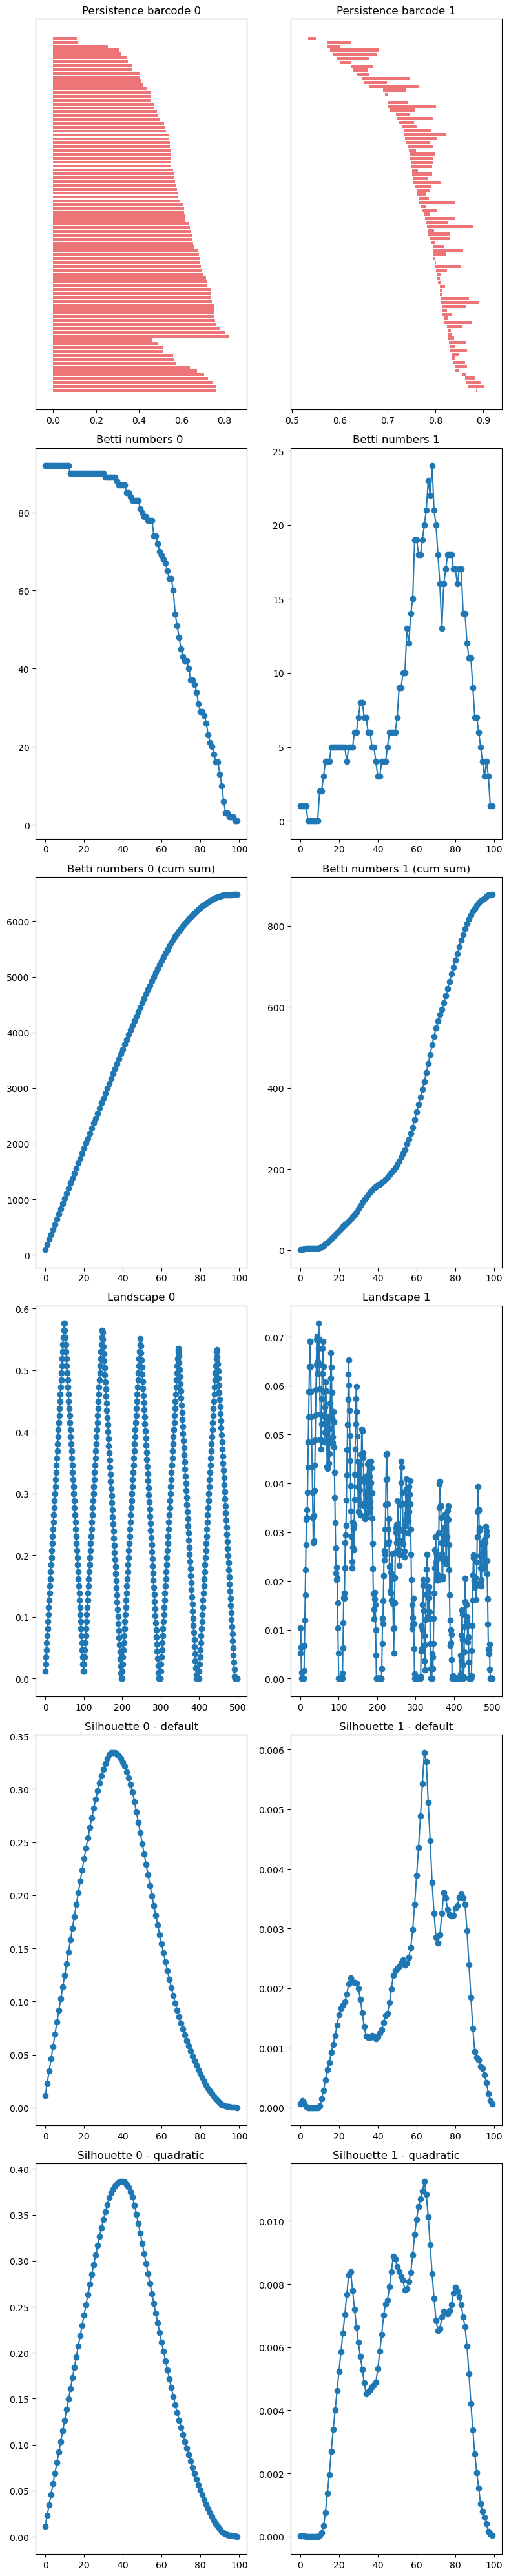

{'pt': [53.144080340862274, 3.2083574533462524],
 'al': [0.5776530471832856, 0.03604896014995789],
 'sd': [0.0721596322352424, 0.0722619489575638],
 'pe': [4.486219033904008, 4.20954580376096],
 'bn': [array([92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 90, 90, 90, 90,
         90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89,
         89, 89, 89, 88, 87, 87, 87, 87, 85, 85, 84, 83, 83, 83, 83, 81, 80,
         79, 79, 78, 78, 78, 74, 74, 72, 70, 69, 68, 67, 65, 63, 63, 60, 54,
         51, 48, 45, 43, 42, 42, 40, 37, 37, 36, 34, 31, 29, 29, 28, 26, 23,
         21, 20, 18, 16, 16, 13, 10,  6,  3,  3,  2,  2,  2,  1,  1]),
  array([ 1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  2,  2,  3,  4,  4,  4,  5,
          5,  5,  5,  5,  5,  5,  5,  4,  5,  5,  5,  6,  6,  7,  8,  8,  7,
          7,  6,  6,  5,  5,  4,  3,  3,  4,  4,  4,  5,  6,  6,  6,  6,  7,
          9,  9, 10, 10, 13, 12, 14, 15, 19, 19, 18, 18, 19, 20, 21, 23, 22,
         24, 21, 20, 18, 16, 13, 16,

In [58]:
tda_text("Musical Instruments Instrument Accessories Drum & Percussion Accessories Drum Set Accessories RTOM Moongel Damper Pads - Original Formula - 6 Pads - MG4RTOMRTOM Moongel Damper Pads - Original Formula - 6 Pads - MG4The world's most highly acclaimed resonance control device ever designed, is effective, simple and versatile.When only the most effective means of controlling a percussion instrument's sound will do, percussionists turn to the Moongel Damper Pad.The self-adhesive gel sticks to the surface of drums, cymbals, and most percussion instruments. The possibilities are endless, by simply moving the damper pad around the surface, you can eliminate any unwanted resonance, and obtain the exact sound the situation demands.The damper pad is washable and will retain its stickiness for years of service.The Moongel Damper Pad is made from a soft non-toxic gel, and is packaged in a durable plastic container. Drummers and sound studios around the world utilize this award-winning product.*Application Notes: The Moongel Damper Pad can be cut to any desirable size for those situations that call for a minimum amount of damping. For maximum resonance control place one damper pad at 12 o'clock or 6 o'clock, and a second damper pad at 3 o'clock or 9 o'clock.")

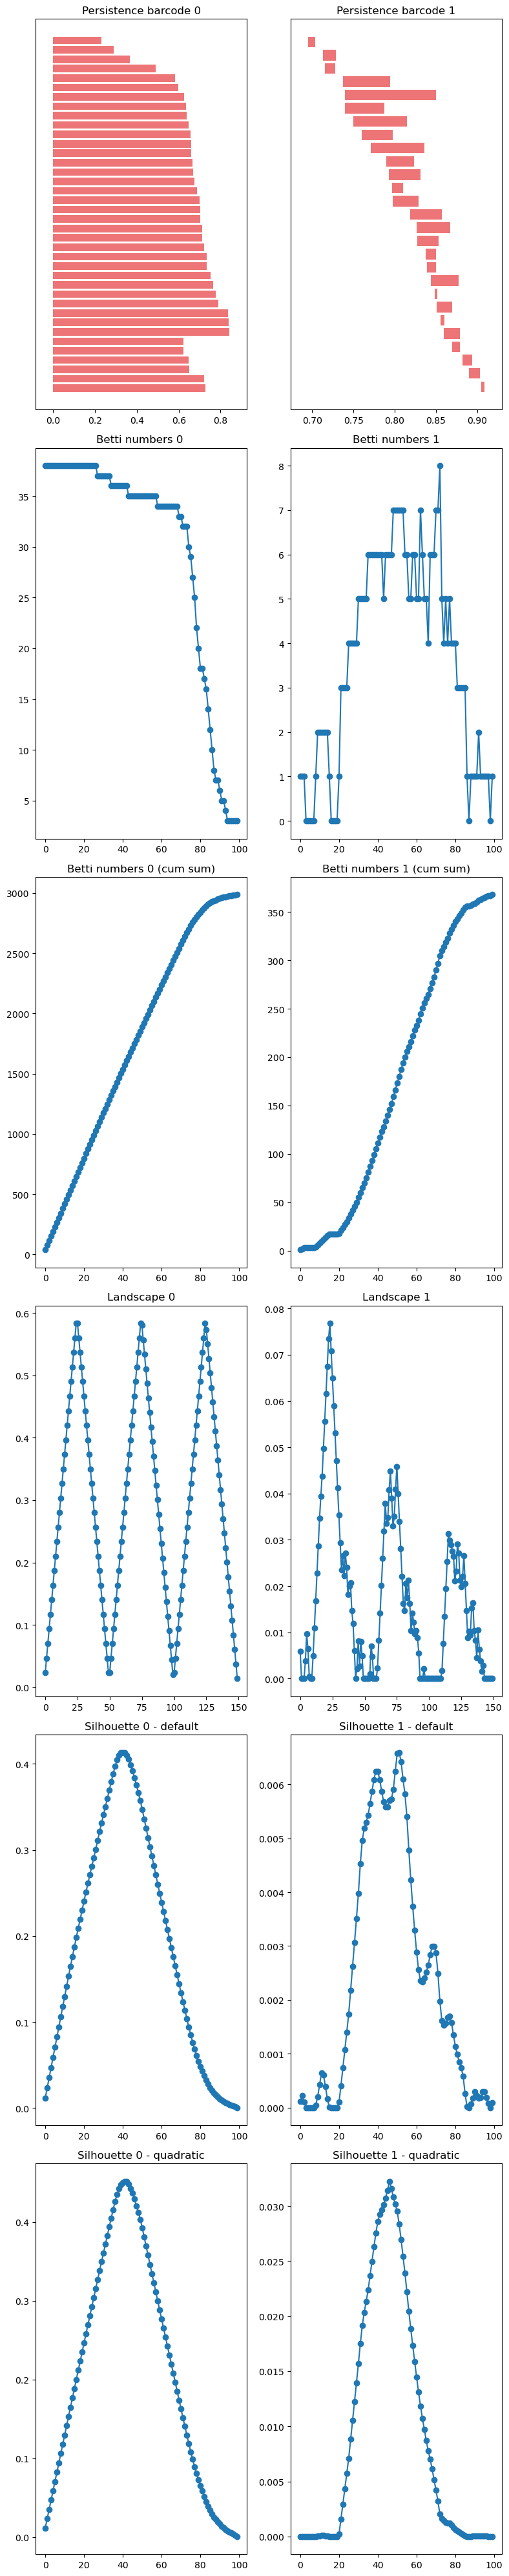

{'pt': [25.08209466934204, 0.7815383076667786],
 'al': [0.6600551228774222, 0.028945863246917725],
 'sd': [0.06455810288882052, 0.05321232981778707],
 'pe': [3.6151693900616624, 2.992097513180255],
 'bn': [array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
         38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37,
         36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35,
         35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
         34, 33, 33, 32, 32, 32, 30, 29, 27, 25, 22, 20, 18, 18, 17, 16, 14,
         12, 10,  8,  7,  7,  6,  5,  5,  4,  3,  3,  3,  3,  3,  3]),
  array([1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 3,
         3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5,
         6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5,
         4, 6, 6, 6, 7, 7, 8, 5, 4, 5, 4, 5, 4, 4, 4, 3, 3, 3, 3, 3, 1, 0,
         1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0

In [55]:
tda_text('Musical Instruments Live Sound & Stage Stage & Studio Cables Instrument Cables HOSA XLR (F) - 3.5mm Tip/Ring/Sleeve, (wired for dual mono), 1 ft. (Discontinued by Manufacturer)HosaA high quality cable that is designed to a connect a microphone with an XLR output to a mini mono phone input. It is ideal for connecting a pro mic to a DV camera, mini audio mixer, or portable audio recorder.')

In [16]:
print(list(google_vectors_2.key_to_index)[:5])

['</s>', 'in', 'for', 'that', 'is']


In [76]:
import re

def compute_TDA(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z']", " ", sentence)
    words = list(set([w for w in sentence.split() if w in google_vectors_2.key_to_index]))
    n = len(words)
    print(n)

    print(words)


    dissimilarity = np.zeros((n, n))


    for i in range(n):
        for j in range(i, n):
            s = google_vectors_2.similarity(words[i], words[j])
            dissimilarity[i][j] = 1 - s
            dissimilarity[j][i] = 1 - s


    # Instantiate topological transformer
    VR = VietorisRipsPersistence(metric="precomputed")


    # Compute persistence diagrams corresponding to each entry (only one here) in X
    persistence = VR.fit_transform([dissimilarity])[0]


    # Descriptors
    persistence_0 = persistence[persistence[:, -1] == 0][:, :2]
    persistence_1 = persistence[persistence[:, -1] == 1][:, :2]
    persistence_0_no_inf = np.array([bars for bars in persistence_0 if bars[1] != np.inf])
    persistence_1_no_inf = np.array([bars for bars in persistence_1 if bars[1] != np.inf])


    # Persistencia total
    pt_0 = np.sum(
       np.fromiter((interval[1] - interval[0] for interval in persistence_0_no_inf), dtype=np.dtype(np.float64)))
    pt_1 = np.sum(
       np.fromiter((interval[1] - interval[0] for interval in persistence_1_no_inf), dtype=np.dtype(np.float64)))


    # Vida mitja
    al_0 = 0
    al_1 = 0


    # Desviacio estandard
    sd_0 = 0
    sd_1 = 0


    # Entropia
    PE = gd.representations.Entropy()
    pe_0 = 0
    pe_1 = 0


    # Betti numbers
    bc = gd.representations.vector_methods.BettiCurve()
    bc_0 = np.zeros(100)
    bc_1 = np.zeros(100)


    # Landscapes
    num_landscapes = 5
    points_per_landscape = 50
    lc = gd.representations.Landscape(num_landscapes=num_landscapes, resolution=points_per_landscape)
    area_under_lc_0 = np.zeros(num_landscapes)
    area_under_lc_1 = np.zeros(num_landscapes)


    # Silhouettes
    p = 2
    resolution = 50
    s = gd.representations.Silhouette()
    s2 = gd.representations.Silhouette(weight=lambda x: np.power(x[1] - x[0], p), resolution=resolution)
    area_under_s_0 = 0
    area_under_s_1 = 0
    area_under_s2_0 = 0
    area_under_s2_1 = 0


    if (persistence_0_no_inf.size > 0):
        al_0 = pt_0 / len(persistence_0_no_inf)
        sd_0 = np.std([(start + end) / 2 for start, end in persistence_0_no_inf])
        pe_0 = PE.fit_transform([persistence_0_no_inf])[0][0]
        bc_0 = bc(persistence_0_no_inf)
        reshaped_landscapes_0 = lc(persistence_0_no_inf).reshape(num_landscapes,points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_0[i] = np.trapz(reshaped_landscapes_0[i], dx=1)
        s_0 = s(persistence_0_no_inf)
        s2_0 = s2(persistence_0_no_inf)
        area_under_s_0 = np.trapz(s_0, dx=1)
        area_under_s2_0 = np.trapz(s2_0, dx=1)


    if (persistence_1_no_inf.size > 0):
        al_1 = pt_1 / len(persistence_1_no_inf)
        sd_1 = np.std([(start + end) / 2 for start, end in persistence_1_no_inf])
        pe_1 = PE.fit_transform([persistence_1_no_inf])[0][0]
        bc_1 = bc(persistence_1_no_inf)
        reshaped_landscapes_1 = lc(persistence_1_no_inf).reshape(num_landscapes, points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_1[i] = np.trapz(reshaped_landscapes_1[i], dx=1)
        s_1 = s(persistence_1_no_inf)
        s2_1 = s2(persistence_1_no_inf)
        area_under_s_1 = np.trapz(s_1, dx=1)
        area_under_s2_1 = np.trapz(s2_1, dx=1)


    # Afegir descriptor
    return np.concatenate(
       (np.array([pt_0, pt_1, al_0, al_1, sd_0, sd_1, pe_0, pe_1, area_under_s_0, area_under_s_1, area_under_s2_0,
                  area_under_s2_1]), area_under_lc_0, area_under_lc_1, np.array(bc_0), np.array(bc_1)))

In [78]:
compute_TDA("musical instruments instrument accessories guitar   bass accessories bags   cases electric guitar bags   cases musician's gear hardshell electric guitar casethis musician's gear deluxe electric case was built to be road tough so you can protect your favorite axe when you're on the go  constructed of   ply cross laminate wood  it has a plush interior lining to keep your baby's finish safe and sound  it also has heavy duty hardware to protect the case from accidental dings while three locking fasteners keep your guitar from any accidental opening while you're en route to your gig or practice  this deluxe case also has an interior accessory compartment that supports the guitar's neck while having enough space to hold your cables  a pedal or two  picks  strings  and more  the musician's gear deluxe electric case fits most stratocasters  telecasters  and similarly shaped guitars")

85
['hardshell', 'three', 'when', 'most', 'lining', 'cables', 'case', 'musical', 'be', 'guitars', 'opening', 'shaped', 'plush', 'that', 'fits', 'similarly', 'instrument', 'gig', 'fasteners', 'this', 'also', 'your', 'picks', 'built', 'route', "baby's", 'or', 'guitar', 'neck', 'on', 'space', 'having', 'was', 'heavy', 'constructed', 'deluxe', 'laminate', 'strings', 'ply', 'hold', 'keep', 'has', 'an', 'hardware', 'cross', 'electric', 'telecasters', 'it', 'from', 'two', 'enough', 'the', 'accessories', 'cases', 'tough', 'compartment', 'can', 'wood', 'pedal', 'go', 'dings', 'so', "you're", 'accidental', 'locking', 'favorite', 'practice', 'bass', 'sound', 'protect', 'more', 'any', 'gear', 'safe', 'finish', 'while', 'road', 'supports', 'duty', 'instruments', 'bags', 'you', 'accessory', 'interior', 'en']


array([4.92537166e+01, 2.93609315e+00, 5.86353769e-01, 3.62480636e-02,
       7.56742951e-02, 7.26646226e-02, 4.39096888e+00, 4.09739057e+00,
       1.59645896e+01, 1.96224687e-01, 9.46518426e+00, 2.31149063e-01,
       1.47555761e+01, 1.35310356e+01, 1.32528522e+01, 1.32302992e+01,
       1.29588466e+01, 1.51617402e+00, 1.06635681e+00, 8.99051997e-01,
       7.54119624e-01, 6.12877768e-01, 8.40000000e+01, 8.40000000e+01,
       8.40000000e+01, 8.40000000e+01, 8.40000000e+01, 8.40000000e+01,
       8.40000000e+01, 8.40000000e+01, 8.30000000e+01, 8.30000000e+01,
       8.30000000e+01, 8.30000000e+01, 8.30000000e+01, 8.30000000e+01,
       8.30000000e+01, 8.30000000e+01, 8.30000000e+01, 8.30000000e+01,
       8.30000000e+01, 8.20000000e+01, 8.20000000e+01, 8.20000000e+01,
       8.20000000e+01, 8.20000000e+01, 8.10000000e+01, 8.10000000e+01,
       8.00000000e+01, 7.90000000e+01, 7.90000000e+01, 7.90000000e+01,
       7.90000000e+01, 7.90000000e+01, 7.90000000e+01, 7.90000000e+01,
      

In [73]:
compute_TDA('Musical Instruments Instrument Accessories General Accessories Tuning Snark SN-8 Super Tight All Instrument TunerSnarkThe Newest! &ldquo;Tunes Tighter So You Sound Better.&rdquo; The SN-8 Snark Super Tight Chromatic Instrument Tuner provides a solid stay-put clip-on direct connection to your instrument. Has more precise tuning, and advanced features! Power saving feature: tuner display will dim after 5 seconds of no sound detected. This conserve battery power. Display returns to normal brightness when a note is detected. If no notes are detected for 2 minutes, tuner will shut off.Improved Full Color visual display with larger improved frequency lines making it an easy read. It can be used in practice or live giging situations. Other features: tap tempo metronome, pitch calibration, and a transpose feature for tuning guitars with capo. Internal vibration sensor detects notes by clipping on directly to instrument.The Snark only weighs 1.5 ounces with a very expertly made clamp with rubber gripping jaws. The lower jaw hinges allowing it to fit any contour. Snark tuners will clip on and stay to even Ovation with the angled head stock. Also has ball socket on each end of the curved mounting post that connects the clamp to the face. Allows 360 degress maneuvering making the Snark perfectly adjustable for most any situation.Comes complete with a CR2032 Lithium 3 volt battery. This is the same kind that many computers use for the clock battery. Battery is held in a simple pull out draw behind tuner face.It&rsquo;s best to tune-up on stage just before you play because the temperature on stage will be a little different than other places in the building. A clip on tuner is fast and you can put the Snark in your pocket as soon as you&rsquo;re done or leave it on instrument. People will even ask you where they can get one because they are so impressive being so small, convenient, and quick to use. Tuning is easy. To go from one note to the next is very fast, almost instant so it takes less time to tune up. Snark has the transpose feature for perfect tuning with capo in place.[if gte mso 9]><xml> <w:WordDocument> <w:View>Normal</w:View> <w:Zoom>0</w:Zoom> <w:TrackMoves  /> <w:TrackFormatting  /> <w:PunctuationKerning  /> <w:ValidateAgainstSchemas  /> <w:SaveIfXMLInvalid>false</w:SaveIfXMLInvalid> <w:IgnoreMixedContent>false</w:IgnoreMixedContent> <w:AlwaysShowPlaceholderText>false</w:AlwaysShowPlaceholderText> <w:DoNotPromoteQF  /> <w:LidThemeOther>EN-US</w:LidThemeOther> <w:LidThemeAsian>X-NONE</w:LidThemeAsian> <w:LidThemeComplexScript>X-NONE</w:LidThemeComplexScript> <w:Compatibility> <w:BreakWrappedTables  /> <w:SnapToGridInCell  /> <w:WrapTextWithPunct  /> <w:UseAsianBreakRules  /> <w:DontGrowAutofit  /> <w:SplitPgBreakAndParaMark  /> <w:EnableOpenTypeKerning  /> <w:DontFlipMirrorIndents  /> <w:OverrideTableStyleHps  /> </w:Compatibility> <w:BrowserLevel>MicrosoftInternetExplorer4</w:BrowserLevel> <m:mathPr> <m:mathFont m:val="Cambria Math"  /> <m:brkBin m:val="before"  /> <m:brkBinSub m:val="&#45;-"  /> <m:smallFrac m:val="off"  /> <m:dispDef  /> <m:lMargin m:val="0"  /> <m:rMargin m:val="0"  /> <m:defJc m:val="centerGroup"  /> <m:wrapIndent m:val="1440"  /> <m:intLim m:val="subSup"  /> <m:naryLim m:val="undOvr"  /> </m:mathPr></w:WordDocument> </xml><![endif][if gte mso 9]><xml> <w:LatentStyles DefLockedState="false" DefUnhideWhenUsed="true"   DefSemiHidden="true" DefQFormat="false" DefPriority="99"   LatentStyleCount="267"> <w:LsdException Locked="false" Priority="0" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Normal"  /> <w:LsdException Locked="false" Priority="9" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="heading 1"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 2"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 3"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 4"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 5"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 6"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 7"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 8"  /> <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 9"  /> <w:LsdException Locked="false" Priority="39" Name="toc 1"  /> <w:LsdException Locked="false" Priority="39" Name="toc 2"  /> <w:LsdException Locked="false" Priority="39" Name="toc 3"  /> <w:LsdException Locked="false" Priority="39" Name="toc 4"  /> <w:LsdException Locked="false" Priority="39" Name="toc 5"  /> <w:LsdException Locked="false" Priority="39" Name="toc 6"  /> <w:LsdException Locked="false" Priority="39" Name="toc 7"  /> <w:LsdException Locked="false" Priority="39" Name="toc 8"  /> <w:LsdException Locked="false" Priority="39" Name="toc 9"  /> <w:LsdException Locked="false" Priority="35" QFormat="true" Name="caption"  /> <w:LsdException Locked="false" Priority="10" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Title"  /> <w:LsdException Locked="false" Priority="1" Name="Default Paragraph Font"  /> <w:LsdException Locked="false" Priority="11" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Subtitle"  /> <w:LsdException Locked="false" Priority="22" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Strong"  /> <w:LsdException Locked="false" Priority="20" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Emphasis"  /> <w:LsdException Locked="false" Priority="59" SemiHidden="false"	UnhideWhenUsed="false" Name="Table Grid"  /> <w:LsdException Locked="false" UnhideWhenUsed="false" Name="Placeholder Text"  /> <w:LsdException Locked="false" Priority="1" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="No Spacing"  /> <w:LsdException Locked="false" Priority="60" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Shading"  /> <w:LsdException Locked="false" Priority="61" SemiHidden="false"	UnhideWhenUsed="false" Name="Light List"  /> <w:LsdException Locked="false" Priority="62" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Grid"  /> <w:LsdException Locked="false" Priority="63" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 1"  /> <w:LsdException Locked="false" Priority="64" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 2"  /> <w:LsdException Locked="false" Priority="65" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 1"  /> <w:LsdException Locked="false" Priority="66" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 2"  /> <w:LsdException Locked="false" Priority="67" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 1"  /> <w:LsdException Locked="false" Priority="68" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 2"  /> <w:LsdException Locked="false" Priority="69" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 3"  /> <w:LsdException Locked="false" Priority="70" SemiHidden="false"	UnhideWhenUsed="false" Name="Dark List"  /> <w:LsdException Locked="false" Priority="71" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Shading"  /> <w:LsdException Locked="false" Priority="72" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful List"  /> <w:LsdException Locked="false" Priority="73" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Grid"  /> <w:LsdException Locked="false" Priority="60" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Shading Accent 1"  /> <w:LsdException Locked="false" Priority="61" SemiHidden="false"	UnhideWhenUsed="false" Name="Light List Accent 1"  /> <w:LsdException Locked="false" Priority="62" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Grid Accent 1"  /> <w:LsdException Locked="false" Priority="63" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 1 Accent 1"  /> <w:LsdException Locked="false" Priority="64" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 2 Accent 1"  /> <w:LsdException Locked="false" Priority="65" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 1 Accent 1"  /> <w:LsdException Locked="false" UnhideWhenUsed="false" Name="Revision"  /> <w:LsdException Locked="false" Priority="34" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="List Paragraph"  /> <w:LsdException Locked="false" Priority="29" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Quote"  /> <w:LsdException Locked="false" Priority="30" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Intense Quote"  /> <w:LsdException Locked="false" Priority="66" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 2 Accent 1"  /> <w:LsdException Locked="false" Priority="67" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 1 Accent 1"  /> <w:LsdException Locked="false" Priority="68" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 2 Accent 1"  /> <w:LsdException Locked="false" Priority="69" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 3 Accent 1"  /> <w:LsdException Locked="false" Priority="70" SemiHidden="false"	UnhideWhenUsed="false" Name="Dark List Accent 1"  /> <w:LsdException Locked="false" Priority="71" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Shading Accent 1"  /> <w:LsdException Locked="false" Priority="72" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful List Accent 1"  /> <w:LsdException Locked="false" Priority="73" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Grid Accent 1"  /> <w:LsdException Locked="false" Priority="60" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Shading Accent 2"  /> <w:LsdException Locked="false" Priority="61" SemiHidden="false"	UnhideWhenUsed="false" Name="Light List Accent 2"  /> <w:LsdException Locked="false" Priority="62" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Grid Accent 2"  /> <w:LsdException Locked="false" Priority="63" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 1 Accent 2"  /> <w:LsdException Locked="false" Priority="64" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 2 Accent 2"  /> <w:LsdException Locked="false" Priority="65" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 1 Accent 2"  /> <w:LsdException Locked="false" Priority="66" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 2 Accent 2"  /> <w:LsdException Locked="false" Priority="67" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 1 Accent 2"  /> <w:LsdException Locked="false" Priority="68" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 2 Accent 2"  /> <w:LsdException Locked="false" Priority="69" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 3 Accent 2"  /> <w:LsdException Locked="false" Priority="70" SemiHidden="false"	UnhideWhenUsed="false" Name="Dark List Accent 2"  /> <w:LsdException Locked="false" Priority="71" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Shading Accent 2"  /> <w:LsdException Locked="false" Priority="72" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful List Accent 2"  /> <w:LsdException Locked="false" Priority="73" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Grid Accent 2"  /> <w:LsdException Locked="false" Priority="60" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Shading Accent 3"  /> <w:LsdException Locked="false" Priority="61" SemiHidden="false"	UnhideWhenUsed="false" Name="Light List Accent 3"  /> <w:LsdException Locked="false" Priority="62" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Grid Accent 3"  /> <w:LsdException Locked="false" Priority="63" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 1 Accent 3"  /> <w:LsdException Locked="false" Priority="64" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 2 Accent 3"  /> <w:LsdException Locked="false" Priority="65" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 1 Accent 3"  /> <w:LsdException Locked="false" Priority="66" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 2 Accent 3"  /> <w:LsdException Locked="false" Priority="67" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 1 Accent 3"  /> <w:LsdException Locked="false" Priority="68" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 2 Accent 3"  /> <w:LsdException Locked="false" Priority="69" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 3 Accent 3"  /> <w:LsdException Locked="false" Priority="70" SemiHidden="false"	UnhideWhenUsed="false" Name="Dark List Accent 3"  /> <w:LsdException Locked="false" Priority="71" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Shading Accent 3"  /> <w:LsdException Locked="false" Priority="72" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful List Accent 3"  /> <w:LsdException Locked="false" Priority="73" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Grid Accent 3"  /> <w:LsdException Locked="false" Priority="60" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Shading Accent 4"  /> <w:LsdException Locked="false" Priority="61" SemiHidden="false"	UnhideWhenUsed="false" Name="Light List Accent 4"  /> <w:LsdException Locked="false" Priority="62" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Grid Accent 4"  /> <w:LsdException Locked="false" Priority="63" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 1 Accent 4"  /> <w:LsdException Locked="false" Priority="64" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 2 Accent 4"  /> <w:LsdException Locked="false" Priority="65" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 1 Accent 4"  /> <w:LsdException Locked="false" Priority="66" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 2 Accent 4"  /> <w:LsdException Locked="false" Priority="67" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 1 Accent 4"  /> <w:LsdException Locked="false" Priority="68" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 2 Accent 4"  /> <w:LsdException Locked="false" Priority="69" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 3 Accent 4"  /> <w:LsdException Locked="false" Priority="70" SemiHidden="false"	UnhideWhenUsed="false" Name="Dark List Accent 4"  /> <w:LsdException Locked="false" Priority="71" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Shading Accent 4"  /> <w:LsdException Locked="false" Priority="72" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful List Accent 4"  /> <w:LsdException Locked="false" Priority="73" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Grid Accent 4"  /> <w:LsdException Locked="false" Priority="60" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Shading Accent 5"  /> <w:LsdException Locked="false" Priority="61" SemiHidden="false"	UnhideWhenUsed="false" Name="Light List Accent 5"  /> <w:LsdException Locked="false" Priority="62" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Grid Accent 5"  /> <w:LsdException Locked="false" Priority="63" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 1 Accent 5"  /> <w:LsdException Locked="false" Priority="64" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 2 Accent 5"  /> <w:LsdException Locked="false" Priority="65" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 1 Accent 5"  /> <w:LsdException Locked="false" Priority="66" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 2 Accent 5"  /> <w:LsdException Locked="false" Priority="67" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 1 Accent 5"  /> <w:LsdException Locked="false" Priority="68" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 2 Accent 5"  /> <w:LsdException Locked="false" Priority="69" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 3 Accent 5"  /> <w:LsdException Locked="false" Priority="70" SemiHidden="false"	UnhideWhenUsed="false" Name="Dark List Accent 5"  /> <w:LsdException Locked="false" Priority="71" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Shading Accent 5"  /> <w:LsdException Locked="false" Priority="72" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful List Accent 5"  /> <w:LsdException Locked="false" Priority="73" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Grid Accent 5"  /> <w:LsdException Locked="false" Priority="60" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Shading Accent 6"  /> <w:LsdException Locked="false" Priority="61" SemiHidden="false"	UnhideWhenUsed="false" Name="Light List Accent 6"  /> <w:LsdException Locked="false" Priority="62" SemiHidden="false"	UnhideWhenUsed="false" Name="Light Grid Accent 6"  /> <w:LsdException Locked="false" Priority="63" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 1 Accent 6"  /> <w:LsdException Locked="false" Priority="64" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Shading 2 Accent 6"  /> <w:LsdException Locked="false" Priority="65" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 1 Accent 6"  /> <w:LsdException Locked="false" Priority="66" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium List 2 Accent 6"  /> <w:LsdException Locked="false" Priority="67" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 1 Accent 6"  /> <w:LsdException Locked="false" Priority="68" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 2 Accent 6"  /> <w:LsdException Locked="false" Priority="69" SemiHidden="false"	UnhideWhenUsed="false" Name="Medium Grid 3 Accent 6"  /> <w:LsdException Locked="false" Priority="70" SemiHidden="false"	UnhideWhenUsed="false" Name="Dark List Accent 6"  /> <w:LsdException Locked="false" Priority="71" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Shading Accent 6"  /> <w:LsdException Locked="false" Priority="72" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful List Accent 6"  /> <w:LsdException Locked="false" Priority="73" SemiHidden="false"	UnhideWhenUsed="false" Name="Colorful Grid Accent 6"  /> <w:LsdException Locked="false" Priority="19" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Subtle Emphasis"  /> <w:LsdException Locked="false" Priority="21" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Intense Emphasis"  /> <w:LsdException Locked="false" Priority="31" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Subtle Reference"  /> <w:LsdException Locked="false" Priority="32" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Intense Reference"  /> <w:LsdException Locked="false" Priority="33" SemiHidden="false"	UnhideWhenUsed="false" QFormat="true" Name="Book Title"  /> <w:LsdException Locked="false" Priority="37" Name="Bibliography"  /> <w:LsdException Locked="false" Priority="39" QFormat="true" Name="TOC Heading"  /> </w:LatentStyles> </xml><![endif][if gte mso 10]> <style>  /* Style Definitions */  table.MsoNormalTable {mso-style-name:"Table Normal"; mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes; mso-style-priority:99; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in 5.4pt; mso-para-margin:0in; mso-para-margin-bottom:.0001pt; mso-pagination:widow-orphan; font-size:10.0pt; font-family:"Times New Roman","serif";} </style> <![endif]')

668
['musical', 'instruments', 'instrument', 'accessories', 'general', 'accessories', 'tuning', 'snark', 'super', 'tight', 'all', 'instrument', 'tighter', 'so', 'you', 'sound', 'the', 'snark', 'super', 'tight', 'chromatic', 'instrument', 'tuner', 'provides', 'solid', 'direct', 'connection', 'your', 'has', 'more', 'precise', 'advanced', 'power', 'saving', 'tuner', 'display', 'will', 'dim', 'after', '5', 'seconds', 'no', 'sound', 'this', 'conserve', 'battery', 'display', 'returns', 'normal', 'brightness', 'when', 'note', 'is', 'if', 'no', 'notes', 'are', 'detected', 'for', '2', 'tuner', 'will', 'shut', 'full', 'color', 'visual', 'display', 'with', 'larger', 'improved', 'frequency', 'lines', 'making', 'it', 'an', 'easy', 'it', 'can', 'be', 'used', 'in', 'practice', 'or', 'live', 'other', 'tap', 'tempo', 'pitch', 'transpose', 'feature', 'for', 'tuning', 'guitars', 'with', 'internal', 'vibration', 'sensor', 'detects', 'notes', 'by', 'clipping', 'on', 'directly', 'snark', 'only', 'weighs', '

array([1.00772279e+02, 8.13894707e+00, 5.33186659e-01, 3.55412536e-02,
       6.79906522e-02, 8.12932384e-02, 5.20396032e+00, 5.06193006e+00,
       1.34053225e+01, 1.82537445e-01, 8.04940974e+00, 3.68580435e-01,
       1.45077852e+01, 1.29338198e+01, 1.29166482e+01, 1.20906198e+01,
       1.20874248e+01, 2.85602502e+00, 2.09078466e+00, 1.74434621e+00,
       1.52002412e+00, 1.33889777e+00, 1.89000000e+02, 1.89000000e+02,
       1.89000000e+02, 1.89000000e+02, 1.89000000e+02, 1.88000000e+02,
       1.88000000e+02, 1.88000000e+02, 1.88000000e+02, 1.87000000e+02,
       1.86000000e+02, 1.86000000e+02, 1.86000000e+02, 1.86000000e+02,
       1.86000000e+02, 1.86000000e+02, 1.86000000e+02, 1.86000000e+02,
       1.86000000e+02, 1.86000000e+02, 1.86000000e+02, 1.86000000e+02,
       1.85000000e+02, 1.84000000e+02, 1.83000000e+02, 1.83000000e+02,
       1.83000000e+02, 1.82000000e+02, 1.82000000e+02, 1.81000000e+02,
       1.80000000e+02, 1.80000000e+02, 1.80000000e+02, 1.80000000e+02,
      

In [80]:
compute_TDA(" musical instruments live sound   stage stage   studio cables instrument cables monster rock 	' instrument cable   angled to straight 	quot  plugs")

15
['stage', 'rock', 'plugs', 'instrument', 'musical', 'instruments', 'cable', 'live', 'quot', 'studio', 'monster', 'straight', 'angled', 'cables', 'sound']


array([ 9.26986265,  0.23803955,  0.66213305,  0.03400565,  0.08101175,
        0.0467264 ,  2.60234716,  1.60118209, 19.72482241,  0.40583662,
       11.34985805,  0.57914788, 15.13348291, 13.33001313, 13.26571457,
       12.91906719, 12.48652449,  0.75330986,  0.51122601,  0.109364  ,
        0.03154914,  0.02460789, 14.        , 14.        , 14.        ,
       14.        , 14.        , 14.        , 14.        , 14.        ,
       14.        , 14.        , 14.        , 14.        , 14.        ,
       14.        , 14.        , 14.        , 14.        , 14.        ,
       14.        , 14.        , 14.        , 14.        , 14.        ,
       13.        , 13.        , 13.        , 13.        , 13.        ,
       13.        , 13.        , 13.        , 13.        , 13.        ,
       13.        , 13.        , 13.        , 13.        , 13.        ,
       13.        , 13.        , 13.        , 13.        , 13.        ,
       13.        , 13.        , 13.        , 13.        , 13.  

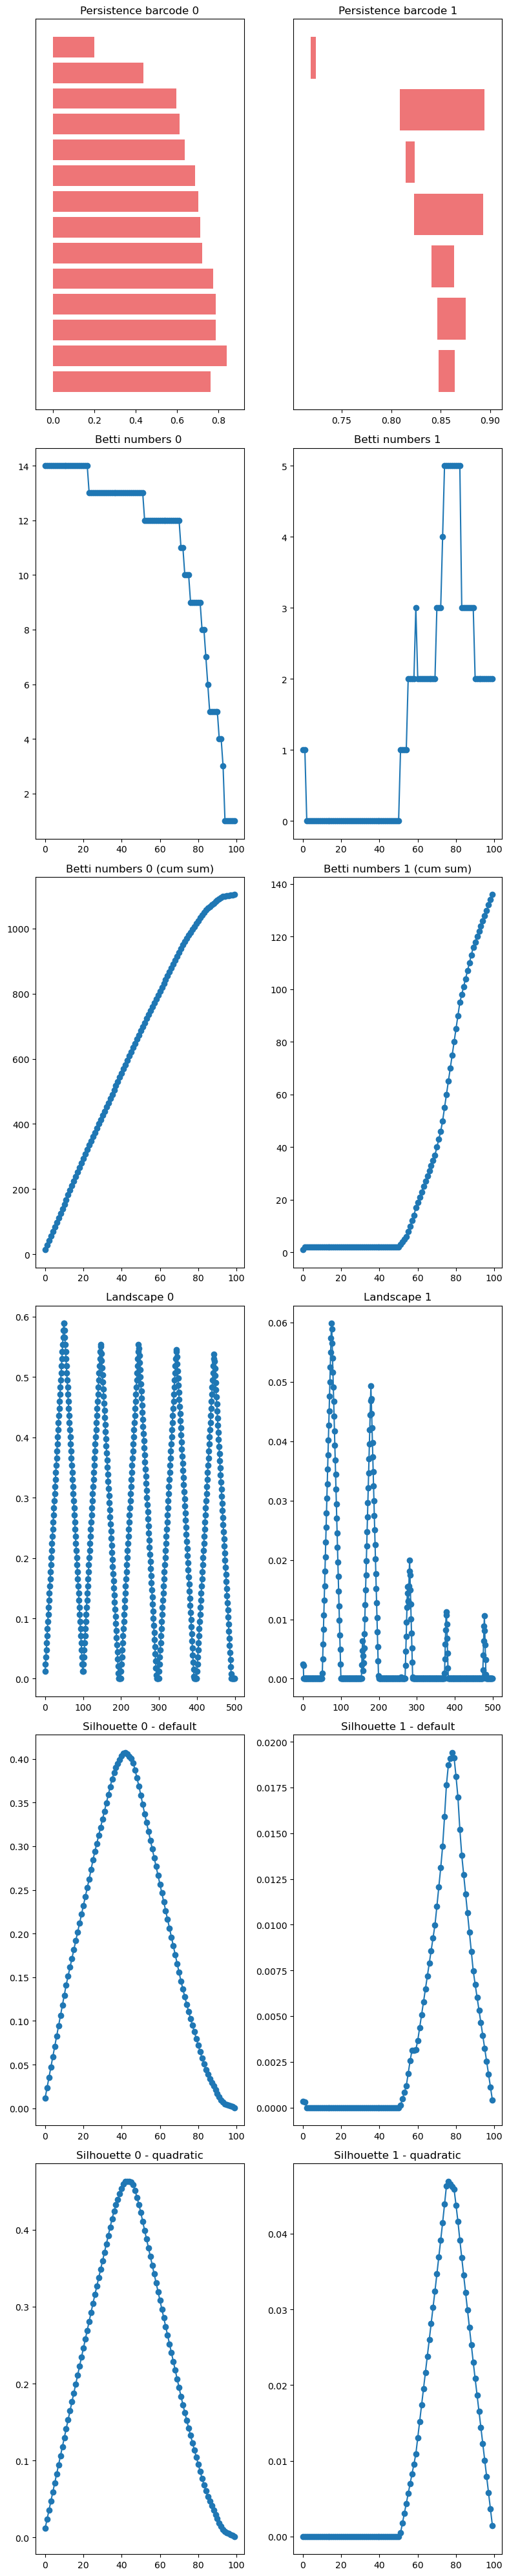

{'pt': [9.269862651824951, 0.2380395531654358],
 'al': [0.6621330465589251, 0.03400565045220511],
 'sd': [0.08101175357596549, 0.04672639831261379],
 'pe': [2.602347155805775, 1.6011820924501639],
 'bn': [array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
         14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
         13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
         13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
         12, 12, 12, 11, 11, 10, 10, 10,  9,  9,  9,  9,  9,  9,  8,  8,  7,
          6,  5,  5,  5,  5,  5,  4,  4,  3,  1,  1,  1,  1,  1,  1]),
  array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3,
         3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [81]:
tda_text(" musical instruments live sound   stage stage   studio cables instrument cables monster rock 	' instrument cable   angled to straight 	quot  plugs")